# Most Visited Monopoly Properties

---

## Import packages

In [1]:
# JSON manipulation
import json

# Randomization
import random

# Count unique values
from collections import Counter

# Matrices manipulation
import numpy as np

# Data frame manipulation
import pandas as pd

# Data viz
from plotnine import *
import plotnine

In [2]:
# Warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Simulation of rolling dices

In [3]:
# Data object
obj = {
    'dices': {},
    'data': []
}

# Number of iteration
num_iter = 100000

for iter_ in range(num_iter):
    # Roll the dices
    dices = random.choices(population = range(1, 7), k = 2)
    # Update the data object - dictionary
    obj['dices'].update(
        {
            iter_: dices
        }
    )
    
    # Update the data object - list
    obj['data'].append(np.sum(dices))

In [4]:
# Data frame
df_dices = pd.DataFrame(
    data = Counter(obj['data']).items(),
    columns = [
        'Sum of Dices',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Sum of Dices'
    ]
).reset_index(
    drop = True
)

# Calculate the probability
df_dices['Probability'] = (
    df_dices['Occurrences'] / df_dices['Occurrences'].sum()
)


In [5]:
# Show the data
df_dices.head(20)

,Sum of Dices,Occurrences,Probability
0,2,2772,0.02772
1,3,5615,0.05615
2,4,8293,0.08293
3,5,11206,0.11206
4,6,13928,0.13928
5,7,16457,0.16457
6,8,13842,0.13842
7,9,11297,0.11297
8,10,8256,0.08256
9,11,5602,0.05602


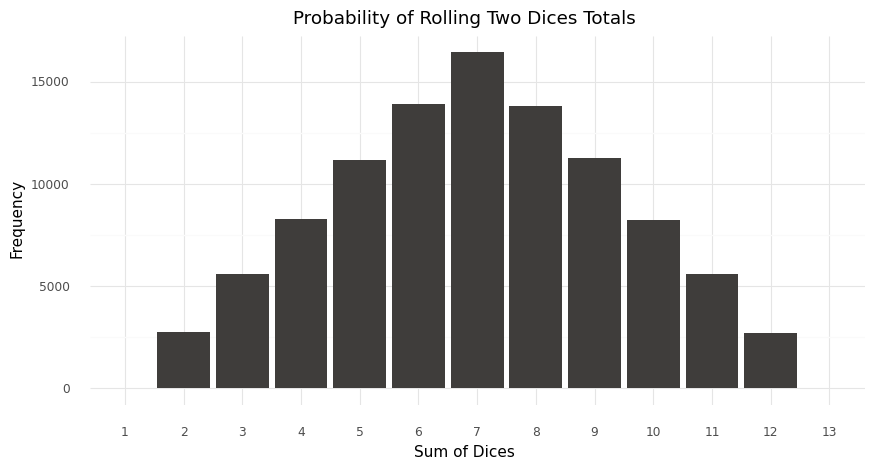

<ggplot: (104184561936)>

In [112]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot(data = df_dices)+
    geom_bar(aes(x = 'Sum of Dices',
                 y = 'Occurrences'),
             fill = '#3F3D3B',
             stat = 'identity')+
    labs(title = 'Probability of Rolling Two Dices Totals')+
    xlab('Sum of Dices')+
    ylab('Frequency')+
    scale_x_discrete(limits = [str(i) for i in range(1, 14)])+
    theme_minimal()
)

## Load the data

### The `chance` and `community chest`

In [7]:
# Open JSON file
card = open('../data/card/chance_community_card.json')
# Returns JSON object as a dictionary
data_card = json.load(card)

In [8]:
# Chance and community cards
data_card['chance_card']

[{'number': 1,
  'naration': 'Advance to Go (Collect Â£200)',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
   'requisite': {'status': False, 'condition': None}},
  'move': {'properties': 1, 'forward': False, 'step': None}},
 {'number': 2,
  'naration': 'Advance to Trafalgar Square. If you pass Go, collect Â£200',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
   'requisite': {'status': True, 'condition': 'pass_go'}},
  'move': {'properties': 25, 'forward': False, 'step': None}},
 {'number': 3,
  'naration': 'Advance to Mayfair',
  'action': 'move',
  'asset': None,
  'money': {'amount': 0,
   'cash': None,
   'requisite': {'status': False, 'condition': None}},
  'move': {'properties': 40, 'forward': False, 'step': None}},
 {'number': 4,
  'naration': 'Advance to Pall Mall. If you pass Go, collect Â£200',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
   're

### The `spaces`

In [9]:
# Open JSON file
space = open('../data/asset/board_spaces.json')
# Returns JSON object as a dictionary
data_space = json.load(space)

In [10]:
# Spaces
data_space

[{'order': 1,
  'name': 'Go',
  'space_type': 'corner_square',
  'color': 'white',
  'money': {'amount': 200, 'cash_in': True}},
 {'order': 2,
  'name': 'Old Kent Road',
  'space_type': 'road',
  'color': 'brown',
  'money': {'amount': 60, 'cash_in': False},
  'rent': {'alone': 2,
   'monopoly': 4,
   'with_house': {'house_1': 10,
    'house_2': 30,
    'house_3': 90,
    'house_4': 160,
    'hotel': 250}},
  'prices': {'printed_price': 60, 'mortgage_value': 30, 'building_costs': 50}},
 {'order': 3,
  'name': 'Community Chest',
  'space_type': 'community_chest',
  'color': 'white',
  'money': {'amount': 0, 'cash_in': False}},
 {'order': 4,
  'name': 'Whitechapel Road',
  'space_type': 'road',
  'color': 'brown',
  'money': {'amount': 60, 'cash_in': False},
  'rent': {'alone': 4,
   'monopoly': 8,
   'with_house': {'house_1': 20,
    'house_2': 60,
    'house_3': 180,
    'house_4': 320,
    'hotel': 450}},
  'prices': {'printed_price': 60, 'mortgage_value': 30, 'building_costs': 50}},


## Take `chance` and `community chest` cards

### Functions for taking a card

In [11]:
# Update spaces
def update_space(
    last_move: int,
    dices: list,
    data_space: dict
    ):
    # Updated board based latest move
    l_board = (data_space[last_move - 1:] + data_space[:last_move - 1])
    # Current space
    d_current_space = [l_board[np.sum(dices) % len(l_board)]]
    
    return d_current_space

In [12]:
# Find the shortest spaces in circular list
def distance_space(
    data_space: dict,
    first_index: int,
    second_index: int
    ):
    # Update the data space
    data_space_update = (data_space[first_index - 1:] + data_space[:first_index - 1])
    
    # Calculate the distance
    distance = next((index for (index, dict_) in enumerate(data_space_update) if dict_['order'] == second_index), None)
    
    return distance

In [13]:
# Find the shortest spaces for spaces in circular list
def shortest_space(
    source: int,
    targets: list,
    data_space: dict
    ):
    # Create a dictionary
    d_targets = {key: None for key in targets}
    
    # Loop the targets
    for target in d_targets.keys():
        # Calculate the minimum distance
        shortest = distance_space(
            data_space = data_space,
            first_index = source,
            second_index = target
        )
        
        # Update the dictionary
        d_targets.update(
            {
                target: shortest
            }
        )
        
    # Get the best space
    space = min(d_targets, key = d_targets.get)

    # Forward-backward status
    forward_status = True
    
    return (space, forward_status)

In [14]:
# Select a card and show the result
def take_cards(
    subiteration_dict: dict,
    card: bool,
    chance_card: bool,
    data_card: dict,
    data_space: dict
    ):
    # Card status
    card_status = card
    
    # Card type
    card = 'community_card'

    # Chance or community chest card
    if chance_card:
        # Update the card type
        card = 'chance_card'
        # Select the card
        chance_cards = data_card['chance_card']
        selected_card = random.choice(chance_cards)
    else:
        # Select the card
        community_cards = data_card['community_card']
        selected_card = random.choice(community_cards)

    # CORE ALGORITHM
    # Update the card status
    subiteration_dict['move'][card] = selected_card['number']
    
    # Run the following command if card is used
    if card_status:
        # Move the space
        if selected_card['action'] in ['move', 'move_money']:
            # Last space
            last_space = subiteration_dict['move']['after']['real']
            if subiteration_dict['move']['after']['updated'] != None:
                last_space = subiteration_dict['move']['after']['updated']
            # Properties
            property_index = selected_card['move']['properties']

            # Move few step
            if selected_card['move']['properties'] == None:
                # Steps
                step = selected_card['move']['step']

                # Multiplier
                multiplier = -1
                # Update the multiplier
                if selected_card['move']['forward']:
                    multiplier = 1

                # Current space
                d_current_space_card = update_space(
                    last_move = last_space,
                    dices = (multiplier * step),
                    data_space = data_space
                )

                # Update the last space
                if card:
                    subiteration_dict['move']['after']['updated'] = d_current_space_card[0]['order']
                    subiteration_dict['move']['forward']['updated'] = selected_card['move']['forward']
                else:
                    pass

            # Move to the specific space
            else:
                # Go to nearest property (998: utilities, 999: stations)
                if property_index in [998, 999]:
                    # Get a list of spaces
                    targets = {
                        998: [13, 29],
                        999: [6, 16, 26, 36]
                    }
                    # Get the shortest space
                    update_index, forward_stat = shortest_space(
                        source = last_space,
                        targets = targets[property_index],
                        data_space = data_space
                    )
                    # Update the last space
                    if card:
                        subiteration_dict['move']['after']['updated'] = update_index
                        subiteration_dict['move']['forward']['updated'] = forward_stat
                    else:
                        pass

                # Go to specific property
                else:
                    # Update the last space
                    if card:
                        subiteration_dict['move']['after']['updated'] = property_index
                        subiteration_dict['move']['forward']['updated'] = True
                    else:
                        pass
    
    # Run the following command if card is not used
    else:
        pass
    
    return subiteration_dict

### Simulation

In [15]:
# Sample data
sample = {
    'subiteration': 1,
    'dices': [2, 3],
    'move': {
        'chance_card': None,
        'community_card': None,
        'jail': {
            'status': False,
            'number': 0
        },
        'before': 30,
        'after': {
            'real': 31,
            'updated': None
        },
        'forward': {
            'real': None,
            'updated': None
        }
    }
}

In [16]:
# Simulation
take_cards(
    subiteration_dict = sample,
    card = False,
    chance_card = True,
    data_card = data_card,
    data_space = data_space
)

{'subiteration': 1,
 'dices': [2, 3],
 'move': {'chance_card': 7,
  'community_card': None,
  'jail': {'status': False, 'number': 0},
  'before': 30,
  'after': {'real': 31, 'updated': None},
  'forward': {'real': None, 'updated': None}}}

## Players movement

### Functions for movement

In [17]:
# Rounds on Monopoly board
def round_spaces(
    dict_spaces: dict
    ):
    # Latest round
    latest_round = dict_spaces['round']
    
    # Update status
    updated_status = False
    # After-before spaces
    before = dict_spaces['move']['before']
    after = dict_spaces['move']['after']['real']
    if dict_spaces['move']['after']['updated'] != None:
        after = dict_spaces['move']['after']['updated']
        updated_status = True
    
    # Create a list
    l = list(range(before, after))
    # Dice roll
    dices_roll = abs(before - after)
    
    # Jail status
    jail_status = dict_spaces['move']['jail']['status']
    # Chance card
    chance_card = dict_spaces['move']['chance_card']
    # Community chest card
    community_card = dict_spaces['move']['community_card']
    
    # If player(s) is on a 'Jail'
    if jail_status == False:
        if (chance_card != None) and (community_card != None):
            # Check condition
            if len(l) == 0:
                # Move forward
                if dices_roll > 12:
                    dict_spaces['round'] += 1
                # Stay
                else:
                    pass
            else:
                # Move backward
                if dices_roll > 12:
                    dict_spaces['round'] -= 1
                # Stay
                else:
                    pass
        else:
            if (chance_card != None):
                pass
    else:
        pass
    
    return dict_spaces

In [18]:
# Player(s) movement
def move_spaces(
    dict_latest: dict,
    dices: int,
    subiteration: int,
    three_times: bool,
    card: bool,
    data_card: dict,
    data_space: dict
    ):
    # Template of players' iteration
    template_iter = {
        'subiteration': subiteration,
        'dices': dices,
        'move': {
            'chance_card': None,
            'community_card': None,
            'jail': {
                'status': False,
                'number': 0
            },
            'before': None,
            'after': {
                'real': None,
                'updated': None
            },
            'forward': {
                'real': None,
                'updated': None
            }
        }
    }
    
    # Jail status and number
    jail_status, jail_trial = dict_latest['move']['jail'].values()
    
    # latest space position
    last_move = dict_latest['move']['after']['real']
    if dict_latest['move']['after']['updated'] != None:
        last_move = dict_latest['move']['after']['updated']
    
    # If player(s) is on jail space
    if jail_status:
        if (len(np.unique(dices)) != 1):
            if (jail_trial < 2):
                # Update dictionary
                template_iter['move']['jail']['status'] = jail_status
                template_iter['move']['jail']['number'] = jail_trial + 1
                template_iter['move']['before'] = last_move
                template_iter['move']['after']['real'] = last_move
            else:
                # Current space
                d_current_space = update_space(
                    last_move = last_move,
                    dices = dices,
                    data_space = data_space
                )
                # Update dictionary
                template_iter['move']['before'] = last_move
                template_iter['move']['after']['real'] = d_current_space[0]['order']
                template_iter['move']['forward']['real'] = True
        else:
            # Current space
            d_current_space = update_space(
                last_move = last_move,
                dices = dices,
                data_space = data_space
            )
            # Update dictionary
            template_iter['move']['before'] = last_move
            template_iter['move']['after']['real'] = d_current_space[0]['order']
            template_iter['move']['forward']['real'] = True
    
    # If player(s) is not on jail space
    else:
        # If player(s) throw the same number three times
        if three_times:
            template_iter['move']['jail']['status'] = True
            template_iter['move']['after']['real'] = 11
            template_iter['move']['before'] = last_move
            template_iter['move']['forward']['real'] = False
        
        # Otherwise
        else:
            # List of space orders based on space type
            d_space = {
                'community_chest': [space['order'] for space in data_space if space['space_type'] == 'community_chest'],
                'chance': [space['order'] for space in data_space if space['space_type'] == 'chance'],
                'road': [space['order'] for space in data_space if space['space_type'] == 'road']
            }

            # Current space
            d_current_space = update_space(
                last_move = last_move,
                dices = dices,
                data_space = data_space
            )
            
            # Update dictionary
            template_iter['move']['before'] = last_move
            template_iter['move']['forward']['real'] = True

            # Player is on 'Go to Jail' space
            if d_current_space[0]['order'] == 31:
                # Update dictionary
                template_iter['move']['jail']['status'] = True
                template_iter['move']['after']['real'] = d_current_space[0]['order']
                template_iter['move']['after']['updated'] = 11
                template_iter['move']['forward']['real'] = True
                template_iter['move']['forward']['updated'] = False

            # Player is not on 'Go to Jail' space
            else:
                # Update dictionary
                template_iter['move']['after']['real'] = d_current_space[0]['order']
                template_iter['move']['forward']['real'] = True

                # Player is on 'Community Chest' space
                if d_current_space[0]['order'] in d_space['community_chest']:
                    # Update dictionary
                    template_iter = take_cards(
                        subiteration_dict = template_iter,
                        card = card,
                        chance_card = False,
                        data_card = data_card,
                        data_space = data_space
                    )
                if d_current_space[0]['order'] in d_space['chance']:
                    # Update dictionary
                    template_iter = take_cards(
                        subiteration_dict = template_iter,
                        card = card,
                        chance_card = True,
                        data_card = data_card,
                        data_space = data_space
                    )
                else:
                    pass
    
    return template_iter

### Simulation

In [19]:
# Sample data
sample = {
    'subiteration': 1,
    'dices': [2, 3],
    'move': {
        'chance_card': None,
        'community_card': None,
        'jail': {
            'status': False,
            'number': 0
        },
        'before': 30,
        'after': {
            'real': 35,
            'updated': None
        },
        'forward': {
            'real': None,
            'updated': None
        }
    }
}

In [20]:
# Simulation
move_spaces(
    dict_latest = sample,
    dices = [7, 6],
    subiteration = 6,
    three_times = False,
    card = True,
    data_card = data_card,
    data_space = data_space
)

{'subiteration': 6,
 'dices': [7, 6],
 'move': {'chance_card': 2,
  'community_card': None,
  'jail': {'status': False, 'number': 0},
  'before': 35,
  'after': {'real': 8, 'updated': 25},
  'forward': {'real': True, 'updated': True}}}

## Core simulation

In [21]:
# Monopoly simulation
def monopoly_simulation(
    num_player: int,
    iteration: int,
    card: bool
    ):
    # String of players
    player_str = ['Player ' + str(i) for i in range(1, num_player + 1)]
    
    # A dictionary for players
    obj = {
        'players': num_player,
        'iteration': iteration,
        'simulation': dict([(idx, dict([('iterations', [])])) for idx in player_str])
    }
    
    # Loop for iterations
    for turn in range(iteration):
        # Loop for players
        for player in player_str:
            # Length of iterations in each player
            length_iter = len(obj['simulation'][player]['iterations'])
            
            if turn == 0:
                # Initial move
                d_last_move = {
                    'subiteration': 0,
                    'dices': [0, 0],
                    'move': {
                        'chance_card': None,
                        'community_card': None,
                        'jail': {
                            'status': False,
                            'number': 0
                        },
                        'before': 1,
                        'after': {
                            'real': 1,
                            'updated': None
                        }
                    }
                }
            else:
                # Check latest move
                d_last_move = obj['simulation'][player]['iterations'][-1]['data'][-1]
            
            # CORE ALGORITHM
            # Template for subiteration
            subiteration_temp = {'iteration': turn, 'data': [d_last_move]}
            # Roll the dices
            dices = random.choices(population = range(1, 7), k = 2)
            # Subiteration
            loop = 1

            # While loop
            while (len(np.unique(dices)) == 1) and (loop < 3):
                # Get the subiteration
                subiteration_data = move_spaces(
                    dict_latest = subiteration_temp['data'][-1],
                    dices = dices,
                    subiteration = loop,
                    three_times = False,
                    card = card,
                    data_card = data_card,
                    data_space = data_space
                )

                # Append the subiteration data
                subiteration_temp['data'].append(subiteration_data)

                # Update the indexer
                dices = random.choices(population = range(1, 7), k = 2)
                loop += 1
            
            else:
                # If same numbers are found three times
                if (len(np.unique(dices)) == 1) and (loop > 2):
                    three_times = True
                # Next move
                else:
                    three_times = False
                
                # Get the subiteration
                subiteration_data = move_spaces(
                    dict_latest = subiteration_temp['data'][-1],
                    dices = dices,
                    subiteration = loop,
                    three_times = three_times,
                    card = card,
                    data_card = data_card,
                    data_space = data_space
                )

                # Append the subiteration data
                subiteration_temp['data'].append(subiteration_data)
            
            # Remove first element in data of 'subiteration_temp'
            subiteration_temp['data'] = subiteration_temp['data'][1:]
            
            # Append the obj
            obj['simulation'][player]['iterations'].append(subiteration_temp)
    
    return obj

### Convert JSON into data frame

In [22]:
# Flatten the JSON
def flatten_json(
    d: dict
    ):
    # Normalize JSON into data frame
    f = pd.json_normalize(d, sep = '_')
    # Data frame into JSON
    result_json = f.to_dict(orient = 'records')[0]
    
    return result_json

### Simulation 1 `(many players, one round)`

In [23]:
# Parameters
num_player = 5
iteration = 20000

# Simulation
data_simulation = monopoly_simulation(
    num_player = num_player,
    iteration = iteration,
    card = True
)

In [24]:
# Show the data
data_simulation

{'players': 5,
 'iteration': 20000,
 'simulation': {'Player 1': {'iterations': [{'iteration': 0,
     'data': [{'subiteration': 1,
       'dices': [6, 3],
       'move': {'chance_card': None,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 1,
        'after': {'real': 10, 'updated': None},
        'forward': {'real': True, 'updated': None}}}]},
    {'iteration': 1,
     'data': [{'subiteration': 1,
       'dices': [5, 4],
       'move': {'chance_card': None,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 10,
        'after': {'real': 19, 'updated': None},
        'forward': {'real': True, 'updated': None}}}]},
    {'iteration': 2,
     'data': [{'subiteration': 1,
       'dices': [1, 2],
       'move': {'chance_card': None,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 19,
        'after': {'real': 22, 'updated': None},
        'forwar

In [25]:
# Flatten full dictionary object
def flatten_obj(
    data_simulation: dict,
    round_iter: int
    ):
    # Players
    players = data_simulation['simulation'].keys()

    # Object to store data
    obj_simulation = []

    # Loop the players
    for player in players:
        # Number of iteration
        data_iterations = data_simulation['simulation'][player]['iterations']

        # Loop the iteration
        for iter_ in range(len(data_iterations)):
            # Selected iteration
            selected_iteration = data_iterations[iter_]
            # Iteration
            n_iteration = selected_iteration['iteration']

            # Loop the subiteration
            for subiter_ in range(len(selected_iteration['data'])):
                # Selected subiteration
                selected_subiteration = selected_iteration['data'][subiter_]
                # Flatten the JSON
                subiteration_reformat = flatten_json(selected_subiteration)
                # Add iteration, player, and round
                new_data = {**{'player': player, 'round': round_iter, 'iteration': n_iteration}, **subiteration_reformat}

                # Append into data object
                obj_simulation.append(new_data)
    
    return obj_simulation

In [26]:
# Flatten the data
obj_simulation = flatten_obj(
    data_simulation = data_simulation,
    round_iter = None
)

In [27]:
# Data frame
df = pd.DataFrame(
    data = obj_simulation
)

In [28]:
# Show the data
df.head(50)

,player,round,iteration,subiteration,dices,move_chance_card,move_community_card,move_jail_status,move_jail_number,move_before,move_after_real,move_after_updated,move_forward_real,move_forward_updated
0,Player 1,None,0,1,"[6, 3]",NaN,NaN,False,0,1,10,NaN,True,None
1,Player 1,None,1,1,"[5, 4]",NaN,NaN,False,0,10,19,NaN,True,None
2,Player 1,None,2,1,"[1, 2]",NaN,NaN,False,0,19,22,NaN,True,None
3,Player 1,None,3,1,"[4, 5]",NaN,NaN,True,0,22,31,11.0,True,False
4,Player 1,None,4,1,"[1, 6]",NaN,NaN,True,1,11,11,NaN,None,None
5,Player 1,None,5,1,"[5, 5]",NaN,NaN,False,0,11,21,NaN,True,None
6,Player 1,None,5,2,"[1, 6]",NaN,NaN,False,0,21,28,NaN,True,None
7,Player 1,None,6,1,"[1, 2]",NaN,NaN,True,0,28,31,11.0,True,False
8,Player 1,None,7,1,"[4, 5]",NaN,NaN,True,1,11,11,NaN,None,None
9,Player 1,None,8,1,"[6, 3]",NaN,NaN,True,2,11,11,NaN,None,None


In [29]:
# Without movement from original space
dict_real = dict(df['move_after_real'].value_counts())
# With movement from original space
dict_updated = dict(df['move_after_updated'].value_counts())

# Merge and sum of two dictionaries
dict_final = dict(Counter(dict_real) + Counter(dict_updated))

In [30]:
# Data frame
df_simulation = pd.DataFrame(
    data = dict_final.items(),
    columns = [
        'Space',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

In [31]:
# Show the data
df_simulation.head()

,Space,Occurrences
0,11,12615
1,25,3559
2,26,3518
3,20,3465
4,1,3362


In [32]:
# Data frame of spaces
df_spaces = pd.DataFrame(data_space)

In [33]:
# Show the data
df_spaces.head()

,order,name,space_type,color,money,rent,prices
0,1,Go,corner_square,white,"{'amount': 200, 'cash_in': True}",NaN,NaN
1,2,Old Kent Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 2, 'monopoly': 4, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
2,3,Community Chest,community_chest,white,"{'amount': 0, 'cash_in': False}",NaN,NaN
3,4,Whitechapel Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 4, 'monopoly': 8, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
4,5,Income Tax,income_tax,white,"{'amount': 200, 'cash_in': False}",NaN,NaN


In [34]:
# Left-join with space data
df_simulation = df_simulation.merge(
    right = df_spaces,
    how = 'left',
    left_on = 'Space',
    right_on = 'order'
)

# Filter columns
df_simulation = df_simulation[['Space', 'Occurrences', 'name', 'space_type', 'color']]

# Rename columns
df_simulation.rename(
    columns = {
        'name': 'Property Name',
        'space_type': 'Type',
        'color': 'Color'
    },
    inplace = True
)

In [35]:
# Show the data
df_simulation.head(40)

,Space,Occurrences,Property Name,Type,Color
0,11,12615,Jail,corner_square,white
1,25,3559,Trafalgar Square,road,red
2,26,3518,Fenchurch St Station,railroad,white
3,20,3465,Vine Street,road,orange
4,1,3362,Go,corner_square,white
5,21,3348,Free Parking,corner_square,white
6,19,3346,Marlborough Street,road,orange
7,23,3316,Chance,chance,white
8,6,3300,King's Cross Station,railroad,white
9,16,3246,Marylebone Station,railroad,white


### Simulation 2 `(many players, many round)`

In [36]:
# Parameters
num_player = 5
iteration = 100
round_ = 200
list_data = []

for r in range(round_):
    # Simulation
    data_simulation = monopoly_simulation(
        num_player = num_player,
        iteration = iteration,
        card = True
    )
    
    # Flatten the data
    obj_simulation = flatten_obj(
        data_simulation = data_simulation,
        round_iter = r
    )
    
    # Append the data
    list_data += obj_simulation

In [37]:
# Data frame
df = pd.DataFrame(
    data = list_data
)

In [38]:
# Show the data
df.head(50)

,player,round,iteration,subiteration,dices,move_chance_card,move_community_card,move_jail_status,move_jail_number,move_before,move_after_real,move_after_updated,move_forward_real,move_forward_updated
0,Player 1,0,0,1,"[1, 4]",NaN,NaN,False,0,1,6,NaN,True,None
1,Player 1,0,1,1,"[5, 2]",NaN,NaN,False,0,6,13,NaN,True,None
2,Player 1,0,2,1,"[1, 4]",NaN,7.0,False,0,13,18,NaN,True,None
3,Player 1,0,3,1,"[2, 4]",NaN,NaN,False,0,18,24,NaN,True,None
4,Player 1,0,4,1,"[4, 1]",NaN,NaN,False,0,24,29,NaN,True,None
5,Player 1,0,5,1,"[1, 5]",NaN,NaN,False,0,29,35,NaN,True,None
6,Player 1,0,6,1,"[4, 5]",NaN,NaN,False,0,35,4,NaN,True,None
7,Player 1,0,7,1,"[4, 4]",NaN,NaN,False,0,4,12,NaN,True,None
8,Player 1,0,7,2,"[4, 4]",NaN,NaN,False,0,12,20,NaN,True,None
9,Player 1,0,7,3,"[2, 5]",NaN,NaN,False,0,20,27,NaN,True,None


In [39]:
# Without movement from original space
dict_real = dict(df['move_after_real'].value_counts())
# With movement from original space
dict_updated = dict(df['move_after_updated'].value_counts())

# Merge and sum of two dictionaries
dict_final = dict(Counter(dict_real) + Counter(dict_updated))

In [40]:
# Data frame
df_simulation = pd.DataFrame(
    data = dict_final.items(),
    columns = [
        'Space',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

In [41]:
# Show the data
df_simulation.head()

,Space,Occurrences
0,11,12570
1,25,3543
2,21,3487
3,26,3477
4,6,3441


In [42]:
# Data frame of spaces
df_spaces = pd.DataFrame(data_space)

In [43]:
# Show the data
df_spaces.head()

,order,name,space_type,color,money,rent,prices
0,1,Go,corner_square,white,"{'amount': 200, 'cash_in': True}",NaN,NaN
1,2,Old Kent Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 2, 'monopoly': 4, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
2,3,Community Chest,community_chest,white,"{'amount': 0, 'cash_in': False}",NaN,NaN
3,4,Whitechapel Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 4, 'monopoly': 8, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
4,5,Income Tax,income_tax,white,"{'amount': 200, 'cash_in': False}",NaN,NaN


In [44]:
# Left-join with space data
df_simulation = df_simulation.merge(
    right = df_spaces,
    how = 'left',
    left_on = 'Space',
    right_on = 'order'
)

# Filter columns
df_simulation = df_simulation[['Space', 'Occurrences', 'name', 'space_type', 'color']]

# Rename columns
df_simulation.rename(
    columns = {
        'name': 'Property Name',
        'space_type': 'Type',
        'color': 'Color'
    },
    inplace = True
)

# Calculate the probability
df_simulation['Probability'] = (
    df_simulation['Occurrences'] / df_simulation['Occurrences'].sum()
)

# Rank
df_simulation['Rank'] = df_simulation['Probability'].rank(
    method = 'average',
    ascending = False
)

# Reorder columns
cols_reorder = ['Rank', 'Space', 'Property Name', 'Occurrences', 'Probability', 'Type', 'Color']
df_simulation = df_simulation[cols_reorder]

In [45]:
# Show the data
df_simulation.head(40)

,Rank,Space,Property Name,Occurrences,Probability,Type,Color
0,1.0,11,Jail,12570,0.097483,corner_square,white
1,2.0,25,Trafalgar Square,3543,0.027477,road,red
2,3.0,21,Free Parking,3487,0.027043,corner_square,white
3,4.0,26,Fenchurch St Station,3477,0.026965,railroad,white
4,5.0,6,King's Cross Station,3441,0.026686,railroad,white
5,6.0,20,Vine Street,3403,0.026391,road,orange
6,7.0,1,Go,3382,0.026228,corner_square,white
7,8.0,23,Chance,3339,0.025895,chance,white
8,9.0,19,Marlborough Street,3321,0.025755,road,orange
9,10.0,18,Community Chest,3307,0.025647,community_chest,white


## Data visualization

### 1 Probability of occurrences by monopoly property

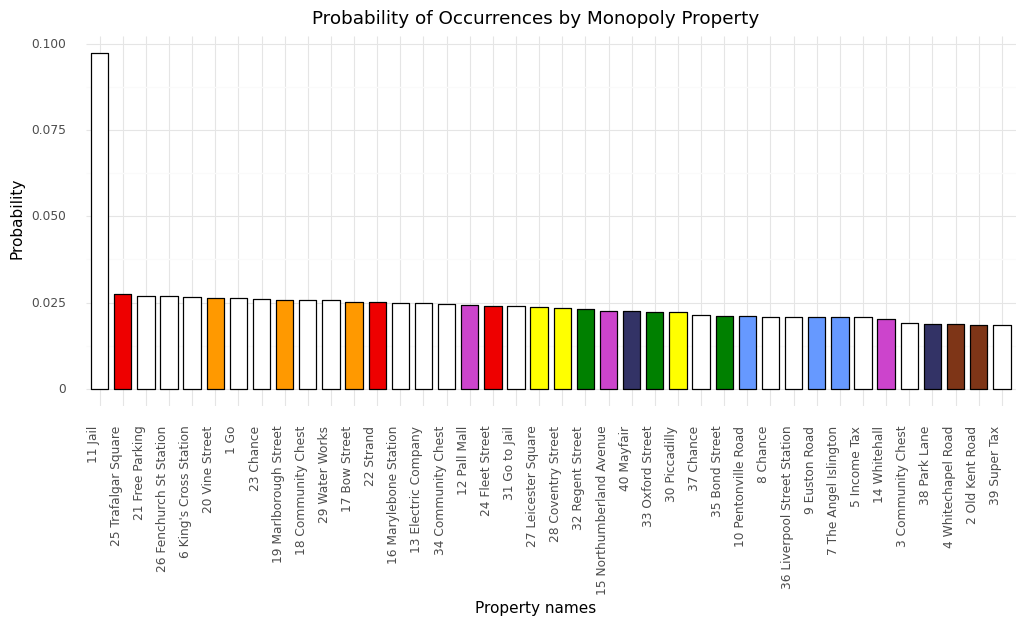

<ggplot: (104183636477)>

In [96]:
# Colors
col_property = {
    'white': '#FFFFFF', 'brown': '#7E3517', 'blue': '#6699FF', 'purple': '#CC44CC', 'orange': '#FF9900',
    'red': '#EE0000', 'yellow': '#FFFF00', 'green': '#008000', 'koamaru': '#333366'
}

# Data manipulation
df_simulation['Property Name Detail'] = (
    df_simulation['Space'].apply(lambda x: str(x)) + ' ' + df_simulation['Property Name']
)

# Map the colors
df_simulation['Color Detail'] = df_simulation['Color'].map(col_property)

# Data viz
plotnine.options.figure_size = (12, 4.8)
(
    ggplot(
        data = df_simulation
    )+
    geom_bar(
        aes(
            x = 'Property Name Detail',
            y = 'Probability'
        ),
        fill = df_simulation['Color Detail'],
        color = '#000000',
        width = 0.75,
        stat = 'identity'
    )+
    scale_x_discrete(
        limits = df_simulation['Property Name Detail'].tolist()
    )+
    labs(
        title = 'Probability of Occurrences by Monopoly Property'
    )+
    xlab(
        'Property names'
    )+
    ylab(
        'Probability'
    )+
    theme_minimal()+
    theme(
        axis_text_x = element_text(
            rotation = 90,
            hjust = 1
        )
    )
)

### 2 Probability of occurrences by monopoly property colors

In [47]:
# Aggregate the data based on their colors
df_color = df_simulation.groupby(['Color', 'Color Detail']).agg(
    {
        'Occurrences':'sum',
    }
).reset_index(
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

# Calculate the probability
df_color['Probability'] = (
    df_color['Occurrences'] / df_color['Occurrences'].sum()
)

# Rank
df_color['Rank'] = df_color['Probability'].rank(
    method = 'average',
    ascending = False
)

# Reorder columns
cols_reorder = ['Rank', 'Color', 'Occurrences', 'Probability', 'Color Detail']
df_color = df_color[cols_reorder]

In [48]:
# Show the data
df_color.head(10)

,Rank,Color,Occurrences,Probability,Color Detail
0,1.0,white,64641,0.501307,#FFFFFF
1,2.0,orange,9965,0.077281,#FF9900
2,3.0,red,9866,0.076513,#EE0000
3,4.0,yellow,8921,0.069185,#FFFF00
4,5.0,purple,8675,0.067277,#CC44CC
5,6.0,green,8620,0.066850,#008000
6,7.0,blue,8093,0.062763,#6699FF
7,8.0,koamaru,5346,0.041460,#333366
8,9.0,brown,4818,0.037365,#7E3517


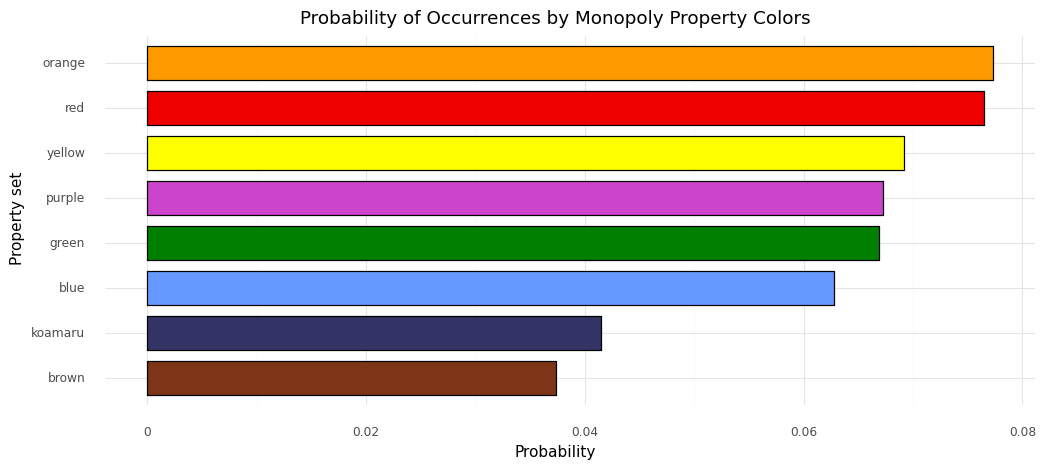

<ggplot: (104184480943)>

In [97]:
# Data manipulation
df_color_edited = df_color[df_color['Color'] != 'white']
df_color_edited = df_color_edited.reset_index(
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = True
)

# Data viz
plotnine.options.figure_size = (12, 4.8)
(
    ggplot(
        data = df_color_edited
    )+
    geom_bar(
        aes(
            x = 'Color',
            y = 'Probability'
        ),
        fill = df_color_edited['Color Detail'].tolist(),
        color = '#000000',
        width = 0.75,
        stat = 'identity'
    )+
    scale_x_discrete(
        limits = df_color_edited['Color'].tolist()
    )+
    labs(
        title = 'Probability of Occurrences by Monopoly Property Colors'
    )+
    xlab(
        'Property set'
    )+
    ylab(
        'Probability'
    )+
    coord_flip()+
    theme_minimal()
)

### 3 Expected income per opponent roll on all properties (roads)

In [50]:
# Filter the spaces
dict_road = [d for d in data_space if d['space_type'] == 'road']

# Flatten the dictionary
obj_road = []
for elem in dict_road:
    flat = flatten_json(elem)
    obj_road.append(flat)

# Convert dictionary to data frame
data_road = pd.DataFrame(obj_road)

# Left-join with space data
data_road = data_road.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability', 'money_amount', 'rent_alone', 'rent_monopoly',
    'rent_with_house_house_1', 'rent_with_house_house_2', 'rent_with_house_house_3',
    'rent_with_house_house_4', 'rent_with_house_hotel', 'prices_building_costs'
]
data_road = data_road[cols_order]

In [51]:
# Show the data
data_road.head()

,order,name,color,Probability,money_amount,rent_alone,rent_monopoly,rent_with_house_house_1,rent_with_house_house_2,rent_with_house_house_3,rent_with_house_house_4,rent_with_house_hotel,prices_building_costs
0,2,Old Kent Road,brown,0.018636,60,2,4,10,30,90,160,250,50
1,4,Whitechapel Road,brown,0.018729,60,4,8,20,60,180,320,450,50
2,7,The Angel Islington,blue,0.020730,100,6,12,30,90,270,400,550,50
3,9,Euston Road,blue,0.020838,100,6,12,30,90,270,400,550,50
4,10,Pentonville Road,blue,0.021195,100,8,16,40,100,300,450,600,50


In [52]:
# Expected income - single property
data_road['exp_income_alone'] = data_road['Probability'] * data_road['rent_alone']
# Expected income - one block property
data_road['exp_income_monopoly'] = data_road['Probability'] * data_road['rent_monopoly']
# Expected income - 1 house
data_road['exp_income_house_1'] = data_road['Probability'] * data_road['rent_with_house_house_1']
# Expected income - 2 house
data_road['exp_income_house_2'] = data_road['Probability'] * data_road['rent_with_house_house_2']
# Expected income - 3 house
data_road['exp_income_house_3'] = data_road['Probability'] * data_road['rent_with_house_house_3']
# Expected income - 4 house
data_road['exp_income_house_4'] = data_road['Probability'] * data_road['rent_with_house_house_4']
# Expected income - 1 hotel
data_road['exp_income_hotel'] = data_road['Probability'] * data_road['rent_with_house_hotel']

In [53]:
# Filter columns
cols_show = [
    'name', 'color',
    'exp_income_alone', 'exp_income_monopoly', 'exp_income_house_1',
    'exp_income_house_2', 'exp_income_house_3', 'exp_income_house_4', 'exp_income_hotel'
]
data_road_income = data_road[cols_show]

In [88]:
# Show the data
data_road_income.style.background_gradient(cmap = 'Blues')

,name,color,exp_income_alone,exp_income_monopoly,exp_income_house_1,exp_income_house_2,exp_income_house_3,exp_income_house_4,exp_income_hotel
0,Old Kent Road,brown,0.037272,0.074543,0.186359,0.559076,1.677227,2.981736,4.658963
1,Whitechapel Road,brown,0.074916,0.149831,0.374578,1.123735,3.371205,5.993253,8.428012
2,The Angel Islington,blue,0.124379,0.248757,0.621893,1.865679,5.597037,8.291907,11.401373
3,Euston Road,blue,0.125030,0.250060,0.625150,1.875451,5.626352,8.335337,11.461088
4,Pentonville Road,blue,0.169561,0.339121,0.847803,2.119508,6.358525,9.537787,12.717050
5,Pall Mall,purple,0.242817,0.485633,1.214084,3.642251,10.926752,15.176044,18.211253
6,Whitehall,purple,0.203032,0.406065,1.015162,3.045485,9.136454,12.689519,15.227423
7,Northumberland Avenue,purple,0.272302,0.544604,1.361511,4.084532,11.345923,15.884292,20.422661
8,Bow Street,orange,0.351886,0.703773,1.759432,5.026949,13.824111,18.851061,23.878010
9,Marlborough Street,orange,0.360572,0.721145,1.802862,5.151033,14.165342,19.316375,24.467409


In [55]:
# Aggregate the data based on their colors
agg_road_income = data_road_income.groupby(['color']).agg(
    {
        'exp_income_monopoly': 'sum',
        'exp_income_house_1': 'sum',
        'exp_income_house_2': 'sum',
        'exp_income_house_3': 'sum',
        'exp_income_house_4': 'sum',
        'exp_income_hotel': 'sum'
    }
).reset_index(
).sort_values(
    by = [
        'exp_income_monopoly'
    ],
    ascending = True
).reset_index(
    drop = True
)

In [87]:
# Show the data
agg_road_income.style.background_gradient(cmap = 'Blues')

,color,exp_income_monopoly,exp_income_house_1,exp_income_house_2,exp_income_house_3,exp_income_house_4,exp_income_hotel
0,brown,0.224375,0.560937,1.682811,5.048432,8.974989,13.086975
1,blue,0.837939,2.094847,5.860638,17.581915,26.165032,35.579511
2,purple,1.436302,3.590756,10.772267,31.409128,43.749855,53.861336
3,orange,2.269433,5.673582,15.984024,43.824111,59.280313,74.736516
4,red,2.764124,6.910311,19.750204,52.426616,66.443057,80.459498
5,yellow,3.132653,7.831634,23.494901,56.454302,68.561596,80.668890
6,green,3.561146,9.115204,27.345612,62.288573,75.658614,87.888247
7,koamaru,3.582923,7.822715,22.998953,52.413044,62.974136,73.535228


In [57]:
# Reshape the data (wide to long format)
long_road_income = pd.melt(
    frame = agg_road_income,
    id_vars = ['color'],
    var_name = ['property'],
    value_name = 'value'
)

In [58]:
# Show the data
long_road_income.head()

,color,property,value
0,brown,exp_income_monopoly,0.224375
1,blue,exp_income_monopoly,0.837939
2,purple,exp_income_monopoly,1.436302
3,orange,exp_income_monopoly,2.269433
4,red,exp_income_monopoly,2.764124


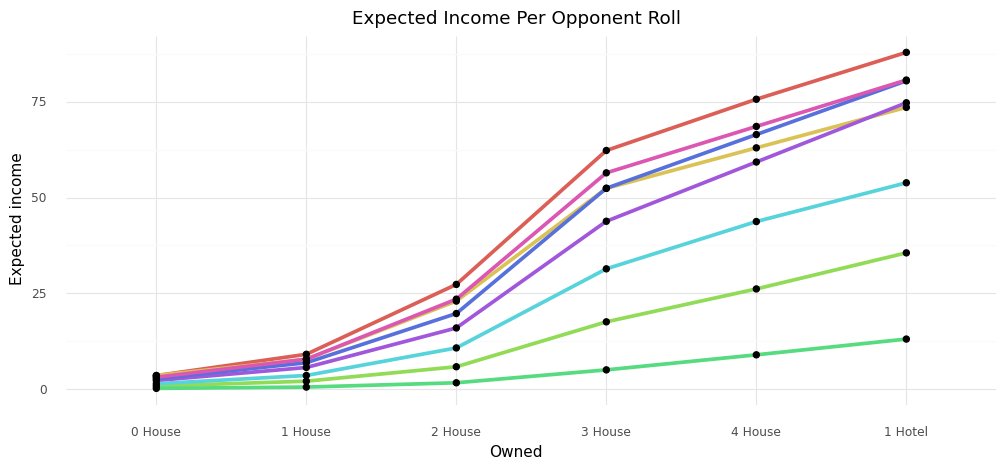

<ggplot: (104184557397)>

In [106]:
# Horizontal axis labels
labels = [
    'exp_income_monopoly', 'exp_income_house_1', 'exp_income_house_2',
    'exp_income_house_3', 'exp_income_house_4', 'exp_income_hotel'
]

# Colors
col_property = {
    'white': '#FFFFFF', 'brown': '#7E3517', 'blue': '#6699FF', 'purple': '#CC44CC', 'orange': '#FF9900',
    'red': '#EE0000', 'yellow': '#FFFF00', 'green': '#008000', 'koamaru': '#333366'
}

# Map the colors
long_road_income['color_detail'] = long_road_income['color'].map(col_property)

# Create a time series plot
(
    ggplot(
        data = long_road_income
    )+
    geom_line(
        aes(
            x = 'property',
            y = 'value',
            group = 'color',
            color = 'color_detail'
        ),
        size = 1.5,
        show_legend = False
    )+
    geom_point(aes(x = 'property',
                   y = 'value',
                   group = 'color'),
               size = 2,
               color = '#000000')+
    scale_x_discrete(
        limits = labels,
        labels = [
            '0 House', '1 House', '2 House', '3 House', '4 House', '1 Hotel'
        ]
    )+
    labs(
        title = 'Expected Income Per Opponent Roll'
    )+
    xlab(
        'Owned'
    )+
    ylab(
        'Expected income'
    )+
    theme_minimal()
)

### 4 Expected income per opponent roll on all properties (railroads)

In [60]:
# Filter the spaces
dict_railroad = [d for d in data_space if d['space_type'] == 'railroad']

# Flatten the dictionary
obj_railroad = []
for elem in dict_railroad:
    flat = flatten_json(elem)
    obj_railroad.append(flat)

# Convert dictionary to data frame
data_railroad = pd.DataFrame(obj_railroad)

# Left-join with space data
data_railroad = data_railroad.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability', 'money_amount',
    'rent_owned_1', 'rent_owned_2', 'rent_owned_3', 'rent_owned_4'
]
data_railroad = data_railroad[cols_order]

In [61]:
# Show the data
data_railroad.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,rent_owned_3,rent_owned_4
0,6,King's Cross Station,white,0.026686,200,25,50,100,200
1,16,Marylebone Station,white,0.024918,200,25,50,100,200
2,26,Fenchurch St Station,white,0.026965,200,25,50,100,200
3,36,Liverpool Street Station,white,0.020924,200,25,50,100,200


In [62]:
# Expected income - own 1 property
data_railroad['exp_income_owned_1'] = data_railroad['Probability'] * data_railroad['rent_owned_1']
# Expected income - own 2 property
data_railroad['exp_income_owned_2'] = data_railroad['Probability'] * data_railroad['rent_owned_2']
# Expected income - own 3 property
data_railroad['exp_income_owned_3'] = data_railroad['Probability'] * data_railroad['rent_owned_3']
# Expected income - own 4 property
data_railroad['exp_income_owned_4'] = data_railroad['Probability'] * data_railroad['rent_owned_4']

In [63]:
# Show the data
data_railroad.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,rent_owned_3,rent_owned_4,exp_income_owned_1,exp_income_owned_2,exp_income_owned_3,exp_income_owned_4
0,6,King's Cross Station,white,0.026686,200,25,50,100,200,0.667145,1.334290,2.668580,5.337159
1,16,Marylebone Station,white,0.024918,200,25,50,100,200,0.622940,1.245880,2.491760,4.983520
2,26,Fenchurch St Station,white,0.026965,200,25,50,100,200,0.674125,1.348249,2.696499,5.392997
3,36,Liverpool Street Station,white,0.020924,200,25,50,100,200,0.523091,1.046182,2.092365,4.184730


In [64]:
# Filter columns
cols_show = [
    'name', 'exp_income_owned_1', 'exp_income_owned_2',
    'exp_income_owned_3','exp_income_owned_4'
]
data_railroad_income = data_railroad[cols_show]

In [65]:
# Show the data
data_railroad_income

,name,exp_income_owned_1,exp_income_owned_2,exp_income_owned_3,exp_income_owned_4
0,King's Cross Station,0.667145,1.334290,2.668580,5.337159
1,Marylebone Station,0.622940,1.245880,2.491760,4.983520
2,Fenchurch St Station,0.674125,1.348249,2.696499,5.392997
3,Liverpool Street Station,0.523091,1.046182,2.092365,4.184730


### 5 Expected income per opponent roll on all properties (utility)

In [66]:
# Filter the spaces
dict_utility = [d for d in data_space if d['space_type'] == 'utility']

# Flatten the dictionary
obj_utility = []
for elem in dict_utility:
    flat = flatten_json(elem)
    obj_utility.append(flat)

# Convert dictionary to data frame
data_utility = pd.DataFrame(obj_utility)

# Left-join with space data
data_utility = data_utility.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability',
    'money_amount', 'rent_owned_1', 'rent_owned_2'
]
data_utility = data_utility[cols_order]

# Rent cost if dices = 7
data_utility['rent_owned_1'] = data_utility['rent_owned_1'] * 7
data_utility['rent_owned_2'] = data_utility['rent_owned_2'] * 7

In [67]:
# Show the data
data_utility.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2
0,13,Electric Company,white,0.024879,150,28,70
1,29,Water Works,white,0.025616,150,28,70


In [68]:
# Expected income - own 1 property
data_utility['exp_income_owned_1'] = data_utility['Probability'] * data_utility['rent_owned_1']
# Expected income - own 2 property
data_utility['exp_income_owned_2'] = data_utility['Probability'] * data_utility['rent_owned_2']

In [69]:
# Show the data
data_utility.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,exp_income_owned_1,exp_income_owned_2
0,13,Electric Company,white,0.024879,150,28,70,0.696607,1.741518
1,29,Water Works,white,0.025616,150,28,70,0.717236,1.793090


In [70]:
# Filter columns
cols_show = [
    'name', 'exp_income_owned_1', 'exp_income_owned_2',
]
data_utility_income = data_utility[cols_show]

In [71]:
# Show the data
data_utility_income

,name,exp_income_owned_1,exp_income_owned_2
0,Electric Company,0.696607,1.741518
1,Water Works,0.717236,1.793090


### 6 Expected number of opponent rolls to recoup incremental cost

#### 6.1 Roads

In [72]:
# Expected number of opponent rolls - single property
data_road['exp_rolls_alone'] = data_road['money_amount'] / data_road['exp_income_alone']
# Expected number of opponent rolls - one block property
data_road['exp_rolls_monopoly'] = data_road['money_amount'] / data_road['exp_income_monopoly']
# Expected number of opponent rolls - 1 house
data_road['exp_rolls_house_1'] = (data_road['money_amount'] + (1 * data_road['prices_building_costs'])) / data_road['exp_income_house_1']
# Expected number of opponent rolls - 2 house
data_road['exp_rolls_house_2'] = (data_road['money_amount'] + (2 * data_road['prices_building_costs'])) / data_road['exp_income_house_2']
# Expected number of opponent rolls - 3 house
data_road['exp_rolls_house_3'] = (data_road['money_amount'] + (3 * data_road['prices_building_costs'])) / data_road['exp_income_house_3']
# Expected number of opponent rolls - 4 house
data_road['exp_rolls_house_4'] = (data_road['money_amount'] + (4 * data_road['prices_building_costs'])) / data_road['exp_income_house_4']
# Expected number of opponent rolls - 1 hotel
data_road['exp_rolls_hotel'] = (data_road['money_amount'] + (5 * data_road['prices_building_costs'])) / data_road['exp_income_hotel']

# Filter columns
cols_show = [
    'name', 'color',
    'exp_rolls_alone', 'exp_rolls_monopoly', 'exp_rolls_house_1',
    'exp_rolls_house_2', 'exp_rolls_house_3', 'exp_rolls_house_4', 'exp_rolls_hotel'
]
data_road_roll = data_road[cols_show]

# Aggregate the data based on their colors
agg_road_roll = data_road_roll.groupby(['color']).agg(
    {
        'exp_rolls_monopoly': 'mean',
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
        'exp_rolls_house_3': 'mean',
        'exp_rolls_house_4': 'mean',
        'exp_rolls_hotel': 'mean'
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_monopoly'
    ],
    ascending = True
).reset_index(
    drop = True
)

In [91]:
# Show the data
agg_road_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_monopoly,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4,exp_rolls_hotel
0,koamaru,221.345034,149.833561,69.341423,38.747413,39.121163,39.401419
1,orange,247.396593,152.181419,72.752642,33.394590,29.737504,27.598085
2,red,249.195324,157.674465,76.148448,35.996008,34.354578,33.339377
3,yellow,255.305554,159.590796,72.353124,38.084416,37.925686,37.815210
4,green,258.395654,166.881530,77.598968,43.682231,43.891540,44.614378
5,purple,308.949107,208.353301,97.708986,42.990024,37.797385,36.496529
6,blue,365.593983,219.356390,102.734035,42.805848,34.541679,29.586092
7,brown,602.675218,441.961826,214.284522,93.749478,65.289815,51.660256


#### 6.2 Railroads

In [74]:
# Expected number of opponent rolls - 1 house
data_railroad['exp_rolls_house_1'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_1']
# Expected number of opponent rolls - 2 house
data_railroad['exp_rolls_house_2'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_2']
# Expected number of opponent rolls - 3 house
data_railroad['exp_rolls_house_3'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_3']
# Expected number of opponent rolls - 4 house
data_railroad['exp_rolls_house_4'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_4']

# Filter columns
cols_show = [
    'name', 'color', 'exp_rolls_house_1', 'exp_rolls_house_2',
    'exp_rolls_house_3', 'exp_rolls_house_4'
]
data_railroad_roll = data_railroad[cols_show]

# Aggregate the data based on their colors
agg_railroad_roll = data_railroad_roll.groupby(['color']).agg(
    {
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
        'exp_rolls_house_3': 'mean',
        'exp_rolls_house_4': 'mean'
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_house_1'
    ],
    ascending = True
).reset_index(
    drop = True
)

# Update value in 'color'
agg_railroad_roll.loc[0, 'color'] = 'railroad'

In [92]:
# Show the data
agg_railroad_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4
0,railroad,324.966668,162.483334,81.241667,40.620833


#### 6.3 Utility

In [76]:
# Expected number of opponent rolls - own 1 property
data_utility['exp_rolls_house_1'] = data_utility['money_amount'] / data_utility['exp_income_owned_1']
# Expected number of opponent rolls - own 2 property
data_utility['exp_rolls_house_2'] = data_utility['money_amount'] / data_utility['exp_income_owned_2']

# Filter columns
cols_show = [
    'name', 'color', 'exp_rolls_house_1', 'exp_rolls_house_2'
]
data_utility_roll = data_utility[cols_show]

# Aggregate the data based on their colors
agg_utility_roll = data_utility_roll.groupby(['color']).agg(
    {
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_house_1'
    ],
    ascending = True
).reset_index(
    drop = True
)

# Update value in 'color'
agg_utility_roll.loc[0, 'color'] = 'utility'

In [93]:
# Show the data
agg_utility_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_house_1,exp_rolls_house_2
0,utility,212.232798,84.893119


#### 6.4 Concatenate the data

In [89]:
# Concatenate the data
agg_property_roll = pd.concat(
    objs = [agg_road_roll, agg_railroad_roll, agg_utility_roll],
    ignore_index = True
).sort_values(
    by = [
        'exp_rolls_monopoly'
    ],
    ascending = False
).reset_index(
    drop = True
).fillna(
    value = 0
)

In [94]:
# Show the data
agg_property_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_monopoly,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4,exp_rolls_hotel
0,brown,602.675218,441.961826,214.284522,93.749478,65.289815,51.660256
1,blue,365.593983,219.356390,102.734035,42.805848,34.541679,29.586092
2,purple,308.949107,208.353301,97.708986,42.990024,37.797385,36.496529
3,green,258.395654,166.881530,77.598968,43.682231,43.891540,44.614378
4,yellow,255.305554,159.590796,72.353124,38.084416,37.925686,37.815210
5,red,249.195324,157.674465,76.148448,35.996008,34.354578,33.339377
6,orange,247.396593,152.181419,72.752642,33.394590,29.737504,27.598085
7,koamaru,221.345034,149.833561,69.341423,38.747413,39.121163,39.401419
8,railroad,0.000000,324.966668,162.483334,81.241667,40.620833,0.000000
9,utility,0.000000,212.232798,84.893119,0.000000,0.000000,0.000000


In [108]:
# Reshape the data (wide to long format)
long_property_roll = pd.melt(
    frame = agg_property_roll,
    id_vars = ['color'],
    var_name = ['property'],
    value_name = 'value'
)

In [109]:
# Show the data
long_property_roll.head()

,color,property,value
0,brown,exp_rolls_monopoly,602.675218
1,blue,exp_rolls_monopoly,365.593983
2,purple,exp_rolls_monopoly,308.949107
3,green,exp_rolls_monopoly,258.395654
4,yellow,exp_rolls_monopoly,255.305554


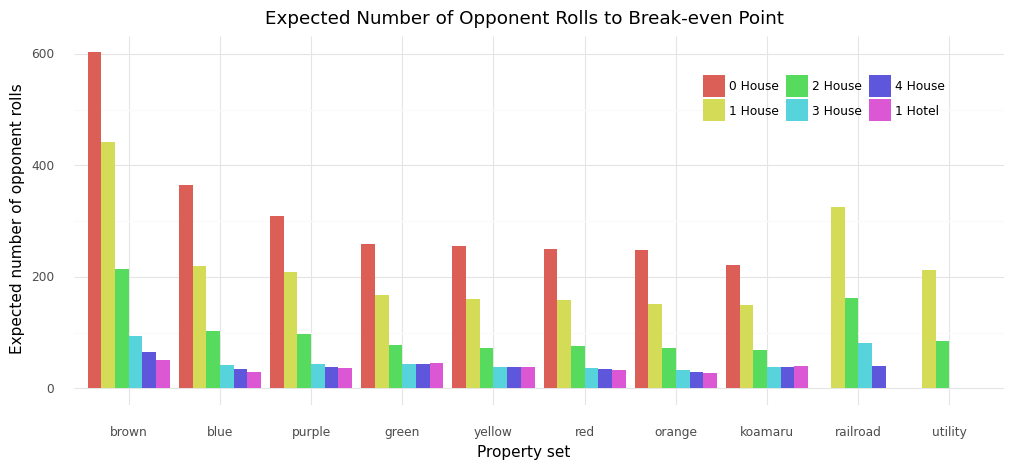

<ggplot: (104185524863)>

In [110]:
# Reorder the column bar
long_property_roll['property'] = long_property_roll['property'].astype('category')
long_property_roll['property'] = long_property_roll['property'].cat.reorder_categories(
    [
        'exp_rolls_monopoly', 'exp_rolls_house_1', 'exp_rolls_house_2',
        'exp_rolls_house_3', 'exp_rolls_house_4', 'exp_rolls_hotel'
    ]
)

# 
# Colors
name_property = {
    'exp_rolls_monopoly': '0 House', 'exp_rolls_house_1': '1 House', 'exp_rolls_house_2': '2 House',
    'exp_rolls_house_3': '3 House', 'exp_rolls_house_4': '4 House', 'exp_rolls_hotel': '1 Hotel'
}

# Map the colors
long_property_roll['property'] = long_property_roll['property'].map(name_property)

# Create a time series plot
(
    ggplot(
        data = long_property_roll
    )+
    geom_bar(
        aes(
            x = 'color',
            y = 'value',
            fill = 'property'
        ),
        stat = 'identity',
        position = position_dodge()
    )+
    scale_x_discrete(
        limits = long_property_roll['color'].unique()
    )+
    labs(
        title = 'Expected Number of Opponent Rolls to Break-even Point'
    )+
    xlab(
        'Property set'
    )+
    ylab(
        'Expected number of opponent rolls'
    )+
    theme_minimal(
    )+
    theme(
        legend_title = element_blank(),
        legend_position = (0.75, 0.75),
        legend_direction = 'horizontal'
    )
)